# Изучение рынка заведений общественного питания Москвы


### Цели и задачи проекта

__Цель проекта__ - провести исследовательский анализ заведений общественного питания  рынка Москвы.

__Задачи проекта:__
- ознакомится с данными и выполнить предобработку данных;
- выполнить исследовательский анализ данных, в ходе которого выяснить:
  - какие категории заведений представлены в данных;
  - какие административные районы Москвы присутствуют в данных;
  - изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
  - исследовать количество посадочных мест в заведениях;
  - исследовать рейтинг заведений;
  - изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений;
  - найти топ-15 популярных сетей в Москве;
  - изучить вариацию среднего чека заведения в зависимости от района Москвы;
- по результатам проведённого исследовательского анализа данных сформулировать итоговый вывод и рекомендации.

### Описание данных

  Датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.
Описание данных

__Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:__
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

**Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:**
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
  - и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: 
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: 
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта
- 1 Загрузка данных и знакомство с ними
  - 1.1  Промежуточный вывод
  - 1.2  Подготовка единого датафрейма
- 2  Предобработка данных
  - 2.1  Промежуточный вывод
- 3 Исследовательский анализ данных
  - 3.1  Категории заведений представленные в данных
  - 3.2  Административные районы Москвы присутствующие в данных
  - 3.3  Соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения
  - 3.4  Количество посадочных мест в заведениях
  - 3.5  Рейтинг заведений
  - 3.6  Данные, показывающие самую сильную корреляцию с рейтингами заведений
  - 3.7  Топ-15 популярных сетей в Москве
  - 3.8  Вариация среднего чека заведения в зависимости от района Москвы
  - 3.9  Промежуточный вывод
- 4  Итоговый вывод и рекомендации


---

## Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [73]:
#Установка инструментов библиотеки phik
!pip install phik

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from phik import phik_matrix 

In [3]:
# загружаем файлы для работы
# Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания
df_i=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

# Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания
df_price=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [4]:
# Выведем 5 первых строк из файла с информацией о заведениях
df_i.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выведем 5 первых строк из файла с информацией о среднем чеке в заведениях
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Информация о данных файла по заведениям
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [7]:
# Информация о данных файла со средним чеком
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;"> 
    
Датафрейм df_i содержит 8406 строк и 9 столбцов. Среди них 2 имеют тип данных float64, 1 тип данных int64 и 6 с типом данных object. Пропуски содержаться в двух столбцах:hours и seats.
    
Датафрейм df_price содержит 4058 строк и 5 столбцов. Среди них 2 имеют тип данных float64 и 3 имеют тип object. Пропуски содержаться во всех столбцах за исключением id.
    
Названия столбцов в обеих датафреймах имеют корректный стиль (snake_case), поэтому менять в дальнейшем нет необходимости, также названия столбцов корректно отображает их содержимое. Типы данных указаны верно, но можно оптимизировать с понижением размерности. </div>

### Подготовка единого датафрейма

In [8]:
# объединим данные в единый датафрейм df
df=df_i.merge(df_price, how='left', on='id')

In [9]:
# проверим результат
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [10]:
# выведем информацию о новом датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


## Предобработка данных

In [11]:
# посмотрим на типы данных в df
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [12]:
#оптимизируем тип данных float
for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup' ]:
    df[column]=pd.to_numeric(df[column], downcast ='float')
    
#оптимизируем тип данных integer
df['chain']=pd.to_numeric(df['chain'], downcast='integer')
    

In [13]:
# типы данных после изменений
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

In [14]:
# посмотрим есть ли аномалии в данных
round(df.describe(),2)
# аномалий не обнаружено

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
count,8406.00,8406.00,4795.00,3149.00,535.00
mean,4.23,0.38,108.42,958.05,174.72
std,0.47,0.49,122.83,1009.73,88.95
min,1.00,0.00,0.00,0.00,60.00
25%,4.10,0.00,40.00,375.00,124.50
50%,4.30,0.00,75.00,750.00,169.00
75%,4.40,1.00,140.00,1250.00,225.00
max,5.00,1.00,1288.00,35000.00,1568.00


In [15]:
# количество пропусков по столбцам
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
district                0
category                0
name                    0
id                      0
address                 0
chain                   0
rating                  0
dtype: int64

In [16]:
# доля пропусков по столбцам
round(df.isna().mean().sort_values(ascending=False),2)

middle_coffee_cup    0.94
middle_avg_bill      0.63
price                0.61
avg_bill             0.55
seats                0.43
hours                0.06
district             0.00
category             0.00
name                 0.00
id                   0.00
address              0.00
chain                0.00
rating               0.00
dtype: float64

__Пропуски содержат следующие столбцы:__
- middle_coffee_cup - 94%(7871). Данные в этом столбце зависят от столбца avg_bill, поэтому пропуски в том столбце объясняют пропуски в этом (но не все). Также содержимое столбца avg_bill должно начинаться с подстроки "Цена одной чашки капучино", только в этом случае данные будут заполнены. Т.к. доля пропусков очень большая, вероятнее всего этот столбец не будет использоваться в дальнейшем, поэтому пропуски мы оставим без изменений. Столбец avg_bill может принимать только один из трех вариантов "Средний счёт", "Цена чашки капучино" или "Цена бокала пива", поэтому заполнить данные самостоятельно мы не можем (могли если бы столбец мог принимать одновременно два варианта, например, "Средний счёт", "Цена чашки капучино").
- middle_avg_bill - 63%(5257). Ситуация аналогична. Данные в этом столбце зависят от столбца avg_bill, поэтому пропуски в том столбце объясняют пропуски в этом (но не все). Также содержимое столбца avg_bill должно начинаться с подстроки "Средний счёт", только в этом случае данные будут заполнены. Данные оставим без изменений, т.к. их объем достаточно большой для удаления.
- price - 61%(5091) - Более, чем у половины заведений не указан уровень цен. Т.к. датасет с ценами содержит данные id в два раза меньше, чем датасет с информацией о заведениях, отсутствие пропусков объяснимо. Для удаления строк объем очень большой, попробуем заменить часть пропусков в  столбце price на чаще всего встречающееся значение в зависимости от средней стоимости заказа и категории заведения.
- avg_bill - 55% (5091). Наличие пропусков также объяснимо меньшим количеством id (в 2 раза) в файле с ценами. Пропуски оставим без изменений.
- seats - 43% (3611) Количество посадочных мест - это второстепенная информация о заведении, и не все заведения её могут прописывать. Пропуски оставим без изменений.
- hours - 6% (536). Не все заведения указали режим работы, но количество пропусков при этом небольшое.

In [17]:
# какие строки содержаться в столбце avg_bill' (для понимания какие варианты может принимать столбец) первые 20
df['avg_bill'].unique()[0:20]
# получаем 3 основные категории: "Средний счёт", "Цена чашки капучино", "Цена бокала пива"

array([nan, 'Средний счёт:1500–1600 ₽', 'Средний счёт:от 1000 ₽',
       'Цена чашки капучино:155–185 ₽', 'Средний счёт:400–600 ₽',
       'Средний счёт:199 ₽', 'Средний счёт:200–300 ₽',
       'Средний счёт:от 500 ₽', 'Средний счёт:1000–1200 ₽',
       'Цена бокала пива:250–350 ₽', 'Средний счёт:330 ₽',
       'Средний счёт:1500 ₽', 'Средний счёт:300–500 ₽',
       'Средний счёт:140–350 ₽', 'Средний счёт:350–500 ₽',
       'Средний счёт:300–1500 ₽', 'Средний счёт:от 240 ₽',
       'Средний счёт:200–250 ₽', 'Средний счёт:328 ₽',
       'Средний счёт:300 ₽'], dtype=object)

In [18]:
# заменим пропуски в  столбце price на чаще всего встречающееся в зависимости от средней стоимости заказа и категории заведения
def mode_price (row):
    if pd.isna(row['price']):
        group = df[(df['category']==row['category']) & (df['avg_bill']==row['avg_bill'])]
        if not group['price'].mode().empty:
            return group['price'].mode().iloc[0]
        else:
            return row['price']
    else:
        return row['price']
    
df['price']=df.apply(mode_price, axis=1)

In [19]:
# доля пропусков по столбцам после преобразований
round(df.isna().mean().sort_values(ascending=False),2)

middle_coffee_cup    0.94
middle_avg_bill      0.63
price                0.55
avg_bill             0.55
seats                0.43
hours                0.06
district             0.00
category             0.00
name                 0.00
id                   0.00
address              0.00
chain                0.00
rating               0.00
dtype: float64

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">   6% пропусков столбца 'price' удалось заполнить, пропуски в остальных столбцах остались без изменений.

In [20]:
# проверим уникальные значения в столбцах 'category' и 'district'
for column in ['category', 'district']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']



In [21]:
# приведем все названия к нижнему регистру для нормализации и исключения дубликатов в дальнейшем
df['name']=df['name'].str.lower()

In [22]:
# количество явных дубликатов
df.duplicated().sum()

np.int64(0)

In [23]:
# количество дубликатов в столбце 'id'
df.duplicated(subset=['id']).sum()

np.int64(0)

In [24]:
#неявные дубликаты по столбцам: 'name', 'address', 'category'
dubl=df[df.duplicated(subset=['name', 'address', 'category'], keep=False)]
dubl

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN


In [25]:
# удалим дубликат, оставив первую встреченную запись
df=df.drop_duplicates(subset=['name', 'address', 'category'])

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

In [26]:
# количество уникальных значений в столбце 'hours'
hour_unique=pd.Series(df['hours'].sort_values().unique()).count()
hour_unique

np.int64(1306)

In [27]:
# уникальные значения, которые содержат подстроки "ежедневно", "круглосуточно"
hour_unique=df['hours'].unique()
for value in hour_unique:
    if 'ежедневно'in str(value) and 'круглосуточно'in str(value):
        print(value)

ежедневно, круглосуточно


In [28]:
# создадим новый столбец marker_user и разделим оценки пользователей на группы.
def hours_is_24_7(x):
    if x=='ежедневно, круглосуточно':
        return 'True'
    else:
        return 'False'

df['is_24_7']=df['hours'].apply(hours_is_24_7)

In [29]:
# посмотрим на датафрейм после добавления нового столбца
df.head(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8405 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8405 non-null   object 
 1   name               8405 non-null   object 
 2   category           8405 non-null   object 
 3   address            8405 non-null   object 
 4   district           8405 non-null   object 
 5   hours              7869 non-null   object 
 6   rating             8405 non-null   float32
 7   chain              8405 non-null   int8   
 8   seats              4794 non-null   float32
 9   price              3785 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  is_24_7            8405 non-null   object 
dtypes: float32(4), int8(1), object(9)
memory usage: 796.2+ KB


---

### Промежуточный вывод


__Изначально датафрейм состоял из 8406 строк и 13 столбцов, после преобразований – 8405 строк (1 удалена) и 14 столбцов (1 добавлен).__

__В ходе предобработки данных было выполнено следующее:__
- оптимизирован тип данных float и integer;
- изучены пропуски в столбцах;
- заменены часть пропусков в  столбце ‘price’ на чаще всего встречающиеся значения в зависимости от средней стоимости заказа и категории заведения. Было 61% (5091 строк) пропусков, стало 55% (3785 строк);
- явные дубликаты не обнаружены, удален один неявный дубликат по названию, адресу и категории;
- создан новый столбец marker_user, с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7.


## Исследовательский анализ данных

---

### Категории заведений, представленные в данных

In [31]:
# Сгруппируем данные по категориям с помощью сводной таблицы
group_category=df.groupby('category')['id'].count().reset_index()
group_category['share']=round(group_category['id']/group_category['id'].sum(),2)
group_category.sort_values(by='id', ascending=False)

,category,id,share
3,кафе,2378,0.28
6,ресторан,2042,0.24
4,кофейня,1413,0.17
0,"бар,паб",765,0.09
5,пиццерия,633,0.08
2,быстрое питание,603,0.07
7,столовая,315,0.04
1,булочная,256,0.03


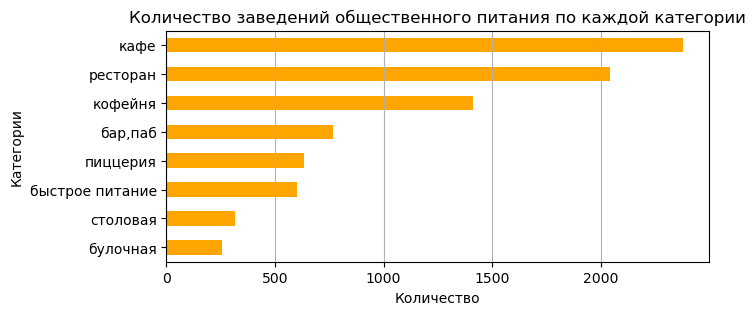

In [32]:
# пострим линейную гстограмму 'Количество заведений общественного питания по каждой категории'
group_category.sort_values(by='id', ascending=True).plot(
               kind='barh',
               figsize=(7,3),
               x='category',
               y='id',
               title='Количество заведений общественного питания по каждой категории',
               color='orange', 
               legend=False
)
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;"> В данных представлено 8 категорий. Категории: 'кафе', 'рестораны' наиболее многочисленны, каждая представляет более 2000 заведений, суммарно они составляют 52% от всех категорий. К категории 'кофейня' относится более 1000 заведений, по остальным категориям менее 1000 заведений. Наименьшая по количеству заведений категории 'булочная' (256 заведений). </div>

---

### Административные районы Москвы  
Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 

In [33]:
# Построим сводную таблицу по количеству и доли заведений в зависимости от округа
pivot_table_district=df.pivot_table(index='district', values='id', aggfunc='count').reset_index()
pivot_table_district['share']=round(pivot_table_district['id']/pivot_table_district['id'].sum(),2)
pivot_table_district.sort_values(by='id', ascending=False)

,district,id,share
5,Центральный административный округ,2242,0.27
2,Северный административный округ,899,0.11
8,Южный административный округ,892,0.11
3,Северо-Восточный административный округ,891,0.11
1,Западный административный округ,851,0.10
0,Восточный административный округ,798,0.09
6,Юго-Восточный административный округ,714,0.08
7,Юго-Западный административный округ,709,0.08
4,Северо-Западный административный округ,409,0.05


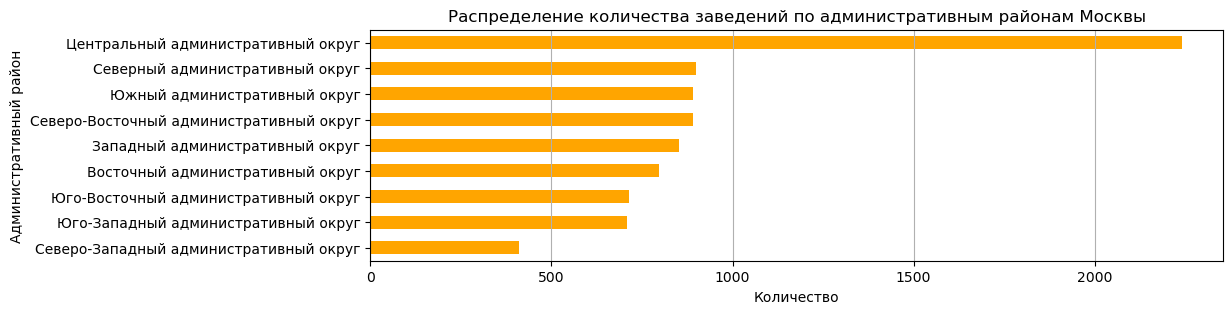

In [34]:
# Пострим линейную гстограмму 'Распределение количества заведений по административным районам Москвы'
pivot_table_district.sort_values(by='id').plot(kind='barh', x='district', y='id', color='orange', figsize=(11,3), legend=False)
plt.title('Распределение количества заведений по административным районам Москвы')
plt.xlabel('Количество')
plt.ylabel('Административный район')
plt.grid(axis='x')
plt.show()

In [35]:
# Построим сводную таблицу по количеству и долям заведений в разрезе категорий для ЦАО
pivot_table_CAO=df[df['district']=='Центральный административный округ'].pivot_table(
                                                                       index='category', 
                                                                        values='id', 
                                                                        aggfunc='count'
).reset_index()
pivot_table_CAO['share']=round(pivot_table_CAO['id']/pivot_table_CAO['id'].sum(),2)
pivot_table_CAO.sort_values(by='id', ascending=False)

,category,id,share
6,ресторан,670,0.30
3,кафе,464,0.21
4,кофейня,428,0.19
0,"бар,паб",364,0.16
5,пиццерия,113,0.05
2,быстрое питание,87,0.04
7,столовая,66,0.03
1,булочная,50,0.02


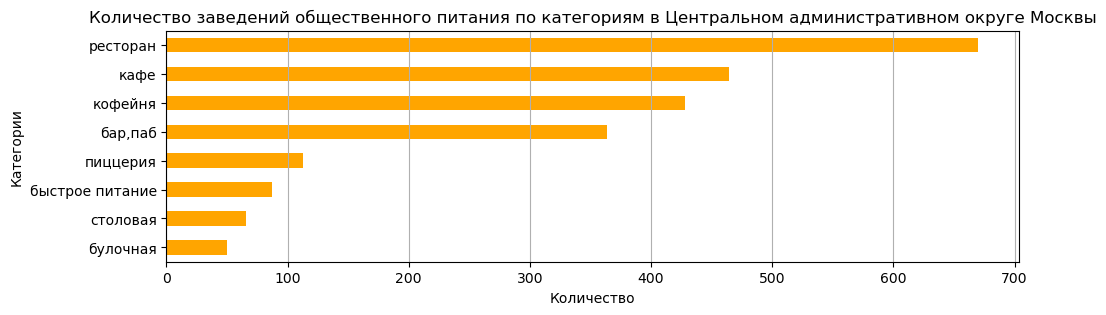

In [36]:
# Пострим линейную гстограмму 'Количество заведений общественного питания по категориям в Центральном административном округе Москвы'
pivot_table_CAO.sort_values(by='id').plot(kind='barh',
                                          x='category',
                                          y='id',
                                          figsize=(11,3),
                                          legend=False,
                                          color='orange'
)
plt.title('Количество заведений общественного питания по категориям в Центральном административном округе Москвы')
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.show()

In [37]:
# Построим сводную таблицу по количеству и долям заведений в разрезе категорий для Москвы за исключением ЦАО
pivot_table_MSK=df[df['district']!='Центральный административный округ'].pivot_table(
                                                                       index='category', 
                                                                        values='id', 
                                                                        aggfunc='count'
).reset_index()
pivot_table_MSK['share']=round(pivot_table_MSK['id']/pivot_table_MSK['id'].sum(),2)
pivot_table_MSK.sort_values(by='id', ascending=False)

,category,id,share
3,кафе,1914,0.31
6,ресторан,1372,0.22
4,кофейня,985,0.16
5,пиццерия,520,0.08
2,быстрое питание,516,0.08
0,"бар,паб",401,0.07
7,столовая,249,0.04
1,булочная,206,0.03


In [38]:
# соединим таблицы по количеству и долям заведений в разрезе категорий отдельно для ЦАО и остальной Москвы 
df_category_MSK=pivot_table_MSK.merge(pivot_table_CAO, on='category', suffixes=('_withoot_CAO', '_CAO'))
df_category_MSK.sort_values(by='id_withoot_CAO', ascending=False)

,category,id_withoot_CAO,share_withoot_CAO,id_CAO,share_CAO
3,кафе,1914,0.31,464,0.21
6,ресторан,1372,0.22,670,0.30
4,кофейня,985,0.16,428,0.19
5,пиццерия,520,0.08,113,0.05
2,быстрое питание,516,0.08,87,0.04
0,"бар,паб",401,0.07,364,0.16
7,столовая,249,0.04,66,0.03
1,булочная,206,0.03,50,0.02


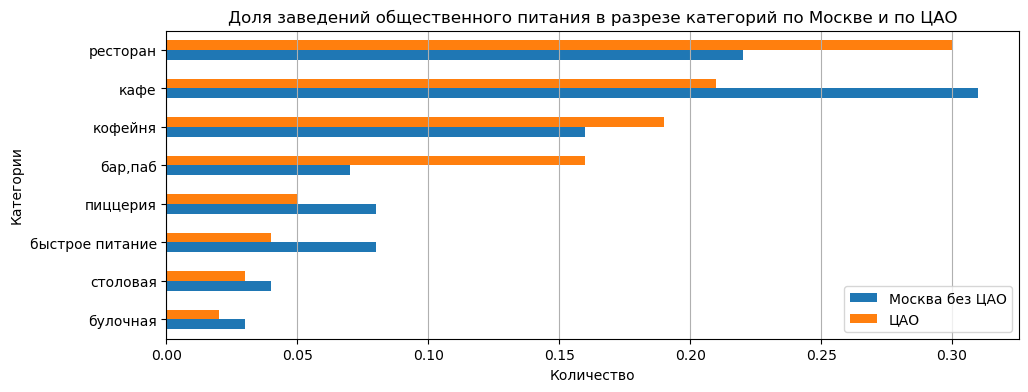

In [39]:
# Пострим линейную гстограмму по доле заведений в каждой категории в сравнении ЦАО и остальной Москвы
df_category_MSK.sort_values(by='share_CAO').plot(kind='barh',
                                          x='category',
                                          y=['share_withoot_CAO', 'share_CAO'],
                                          figsize=(11,4),
                                          legend=True
)
plt.title('Доля заведений общественного питания в разрезе категорий по Москве и по ЦАО')
plt.xlabel('Количество')
plt.ylabel('Категории')
plt.legend(['Москва без ЦАО', 'ЦАО'], loc='best')
plt.grid(axis='x')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;"> 
    Больше всего заведений находятся в Центральном административном округе 2242 или 27%, он сильно отличается от остальных. Заведения по остальным районам распределены от 5% до 11% (от 409 до 899 заведений на округ).
Также отличается распределения в ЦАО по категориям заведений, если по Москве наибольшее количество заведений в формате 'кафе' (31%), то ЦАО представлен в большинстве 'ресторанами' (30% от всех заведений). Также в ЦАО 'кофейни' и 'бары' имеют большую долю в отличие от всей Москвы, в Москве же больше 'пиццерий', 'быстрого питания', 'столовых', 'булочных' в долевом соотношении.
    </div>

---

### Сетевые и несетевые заведения
Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Выясним, какие категории заведений чаще являются сетевыми.

In [40]:
# Сгруппируем данные по наличию признака сетевого заведения, сосчитаем количество заведений и долю
group_chain=df.groupby('chain')['id'].count().reset_index()
group_chain['share']=round(group_chain['id']/group_chain['id'].sum(),2)
group_chain

,chain,id,share
0,0,5201,0.62
1,1,3204,0.38


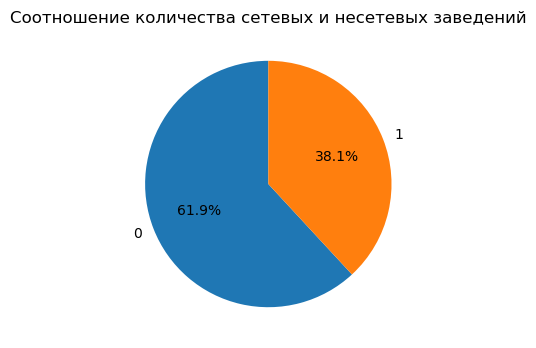

In [41]:
# Построим круговую диаграмму "Соотношение количества сетевых и несетевых заведений"
group_chain.plot(kind='pie', y='id', figsize=(4,4),rot=0, autopct='%1.1f%%', legend=False, startangle=90, )
plt.ylabel('')
plt.title('Соотношение количества сетевых и несетевых заведений')
plt.show()

In [42]:
# Построим сводную таблицу 'Количество и доля сетевых и несетевых заведений в разрезе категорий'
table_chain=df.pivot_table(index='category', columns='chain', values='id', aggfunc='count').reset_index()
table_chain['share_0']=round(table_chain[0]/table_chain[0].sum(),2)
table_chain['share_1']=round(table_chain[1]/table_chain[1].sum(),2)
table_chain['difference']=abs(table_chain['share_1']-table_chain['share_0'])
table_chain.sort_values(by='difference', ascending=False)

chain,category,0,1,share_0,share_1,difference
4,кофейня,693,720,0.13,0.22,0.09
3,кафе,1599,779,0.31,0.24,0.07
0,"бар,паб",596,169,0.11,0.05,0.06
5,пиццерия,303,330,0.06,0.10,0.04
1,булочная,99,157,0.02,0.05,0.03
6,ресторан,1313,729,0.25,0.23,0.02
7,столовая,227,88,0.04,0.03,0.01
2,быстрое питание,371,232,0.07,0.07,0.00


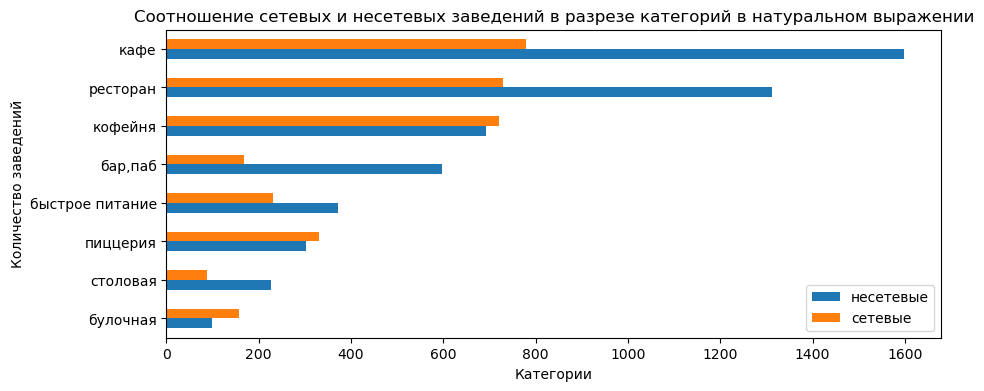

In [43]:
# Пострим линейную гстограмму 'Соотношение сетевых и несетевых заведений в разрезе категорий в натуральном выражении'
table_chain.sort_values(by=0).plot(kind='barh', x='category', y=[0, 1], figsize=(10,4))
plt.title('Соотношение сетевых и несетевых заведений в разрезе категорий в натуральном выражении')
plt.xlabel('Категории')
plt.ylabel('Количество заведений')
plt.legend(['несетевые', 'сетевые'])
plt.show()

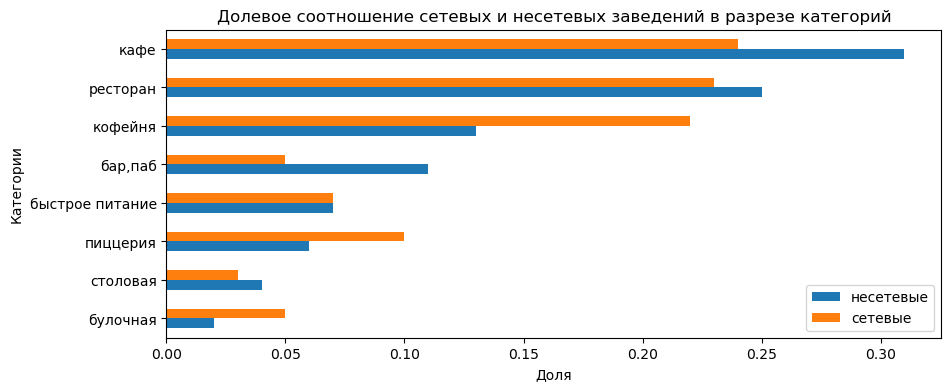

In [44]:
# Пострим линейную гстограмму 'Долевое соотношение сетевых и несетевых заведений в разрезе категорий'
table_chain.sort_values(by='share_0').plot(kind='barh', x='category', y=['share_0', 'share_1'], figsize=(10,4))
plt.title('Долевое соотношение сетевых и несетевых заведений в разрезе категорий')
plt.xlabel('Доля')
plt.ylabel('Категории')
plt.legend(['несетевые', 'сетевые'])
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">
    Несетевых заведений больше, чем сетевых на 24%. Доля сетевых заведений в категориях 'кофейня', 'пиццерия', 'булочная' больше, чем несетевых. Обратная ситуация наблюдается по категориям: 'кафе', 'ресторан', 'бар,паб', 'столовая'. Доли в категории 'быстрое питание' равны, не зависимо от наличия сети. Самое сильно различие 9% наблюдается в категории 'кофейня'.
</div>

---

### Посадочные места в заведениях

Исследуем количество посадочных мест в заведениях. Аномальные значения или выбросы, с чем они могут быть связаны.


In [45]:
# сводная статистика по количеству посадочных мест
round(df['seats'].describe(),2)

count    4794.00
mean      108.41
std       122.84
min         0.00
25%        40.00
50%        75.00
75%       140.00
max      1288.00
Name: seats, dtype: float64

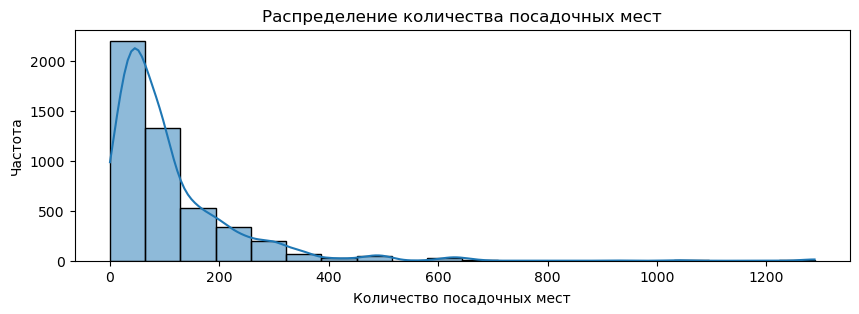

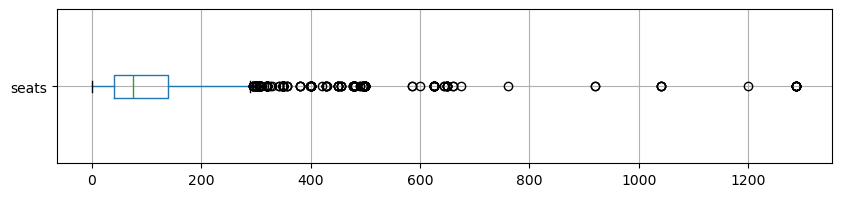

In [46]:
# Построим гистограмму распределение количества посадочных мест
plt.figure(figsize=(10,3))
sns.histplot(data=df, x='seats', bins=20, kde=True)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.title('Распределение количества посадочных мест')
plt.show()

# Строим диаграмму размаха методом boxplot()
boxplot=df.boxplot(column='seats', vert=False, figsize=(10,2))

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
В данных количества посадочных мест встречаются аномальные данные. Минимальное значение 0, это может соответствовать действительности, например, для заведения, где продают шаурму, или если заведение располагается в торговом центре на фудкорте, но, возможно, данных по этим заведениям нет, поэтому пропуски частично были заменены на индикатор '0', ввиду всей информации оставим без изменений. Максимальное значение 1288 мест, теоретически такое может быть, особенно если заведение состоит из нескольких банкетных залов, но вероятнее всего это ошибка. Медиана и среднее отличаются, поэтому распределение нельзя назвать близким к нормальному. График распределения сильно смещен влево, диаграмма размаха показывает много выбросов. 
Т.к. максимальные значения вероятнее всего являются ошибочными и соответствуют выбросам их следует исключить из анализа посадочных мест.
</div>

In [47]:
# Находим 95-й процентиль
outliers=df['seats'].quantile(0.95)

#Находим межквартильный размах IQR
# Вычисляем квартили Q1 и Q3
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

print(f'95-й процентиль: {outliers}')
print(f'Верхний порог выбросов: {upper_bound}')

95-й процентиль: 307.0
Верхний порог выбросов: 290.0


In [48]:
# отфильтруем данные по верхнему поргу выбросов
df_seats_new=df.loc[df['seats']<upper_bound]

In [49]:
# Сводная статистика по количеству посадочных мест после удаления выбросов
round(df_seats_new['seats'].describe(),2)

count    4468.00
mean       84.21
std        65.32
min         0.00
25%        40.00
50%        69.00
75%       116.00
max       287.00
Name: seats, dtype: float64

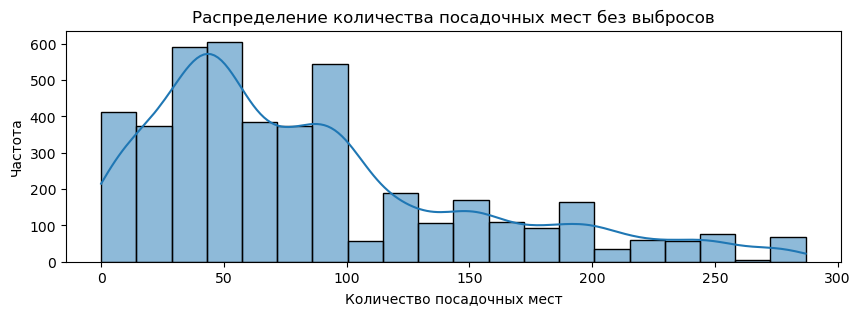

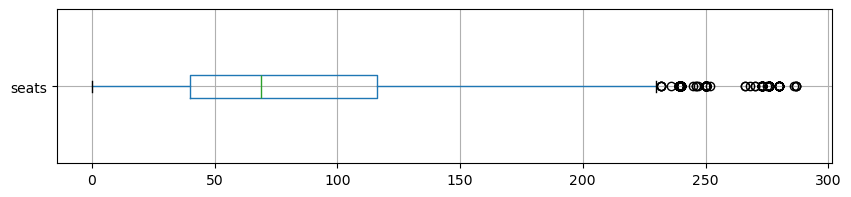

In [50]:
# Построим гистограмму распределение количества посадочных мест после удаления выбросов
plt.figure(figsize=(10,3))
sns.histplot(data=df_seats_new, x='seats', bins=20, kde=True)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.title('Распределение количества посадочных мест без выбросов')
plt.show()

# Строим диаграмму размаха методом boxplot() после удаления выбросов
plt.figure(figsize=(10,2))
boxplot=df_seats_new.boxplot(column='seats', vert=False)
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Диаграмма размаха показывает выбросы примерно от 240 посадочных мест. 95-й процентиль = 307 мест, верхний порог выброса, найденный с помощью межквартильного размаха = 290. Отфильтровав данные по верхнему порогу выбросов получили сокращение разницы между медианой и средним, т.е. данные стали немного ближе к нормальному распределению, однако из гистограммы распределения видно правое ассимитричное распределение. Чаще всего встречаются заведения с количеством мест около 50. На диаграмме размах выбросы остались от 240 мест, что соответствует изначально 90 квартелю.
    </div>

Text(0.5, 1.0, 'Количество посадочных мест в разрезе категорий')

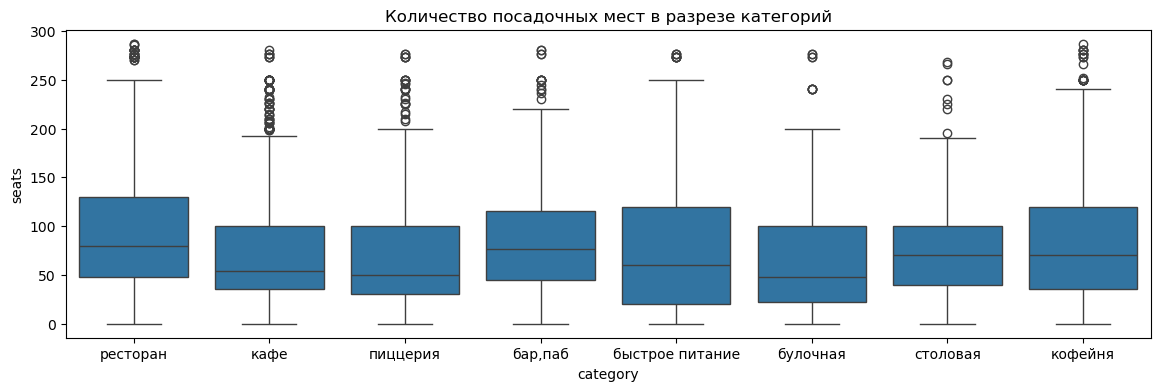

In [51]:
# Построим диаграмму размаха 'Количество посадочных мест в разрезе категорий'
plt.figure(figsize=(14,4))
boxplot=sns.boxplot(data=df_seats_new, x='category', y='seats')
plt.title('Количество посадочных мест в разрезе категорий')

In [52]:
# Построим сводную статистику по количеству посадочных мест в разрезе категорий
group_seats1=df_seats_new.groupby('category')['seats'].agg(['min', 'mean', 'median','std','max']).reset_index()
group_seats2=df_seats_new.groupby('category')['seats'].quantile([0.25, 0.75]).unstack().rename(columns={0.25: 'q25', 0.75: 'q75'}).reset_index()
group_seats=group_seats1.merge(group_seats2, on='category').sort_values(by='median', ascending=False)
group_seats

,category,min,mean,median,std,max,q25,q75
6,ресторан,0.0,96.231689,80.0,66.062691,287.0,48.0,130.0
0,"бар,паб",0.0,88.484634,77.0,59.247684,280.0,45.0,115.0
4,кофейня,0.0,84.548988,70.0,66.299461,287.0,36.0,120.0
7,столовая,0.0,78.554840,70.0,57.099724,268.0,40.0,100.0
2,быстрое питание,0.0,81.164635,60.0,72.438797,276.0,20.0,120.0
3,кафе,0.0,75.489975,54.0,61.836163,280.0,35.0,100.0
5,пиццерия,0.0,76.837440,50.0,66.806061,276.0,30.0,100.0
1,булочная,0.0,75.148933,48.0,70.758133,276.0,22.0,100.0


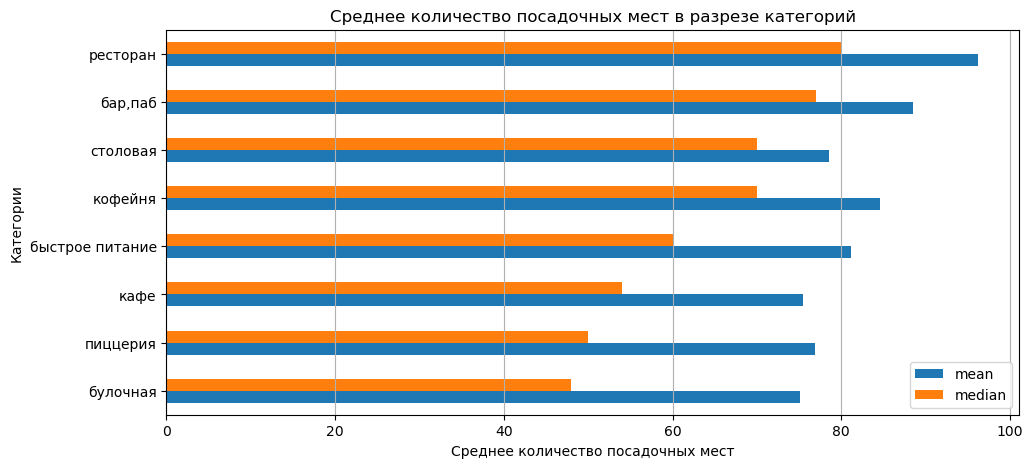

In [53]:
# Пострим линейную гстограмму 'Среднее количество посадочных мест в разрезе категорий'
group_seats.sort_values(by='median').plot(kind='barh', x='category', y=['mean','median'],figsize=(11,5))
plt.title('Среднее количество посадочных мест в разрезе категорий')
plt.xlabel('Среднее количество посадочных мест')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Разброс мест в нашем исправленном датасете (ранее убрали выбросы выше верхнего порога) варьируется от 0 до 287 посадочных мест. Диаграмма размаха в разрезе категорий показывает, что тенденция количества посадочных не отличается очень сильно в какой-то отдельной категории. Сводная статистика и линейная диаграмма показывают, что медианное значение варьируется от 48(для булочной) до 80 (для ресторанов), среднее значение от 75 до 96, минимальное значение одинаково для всех категорий и равно 0.
    </div>

---

### Рейтинг заведений


In [54]:
# Сводня статистика по рейтингу
round(df['rating'].describe(),2)

count    8405.00
mean        4.23
std         0.47
min         1.00
25%         4.10
50%         4.30
75%         4.40
max         5.00
Name: rating, dtype: float64

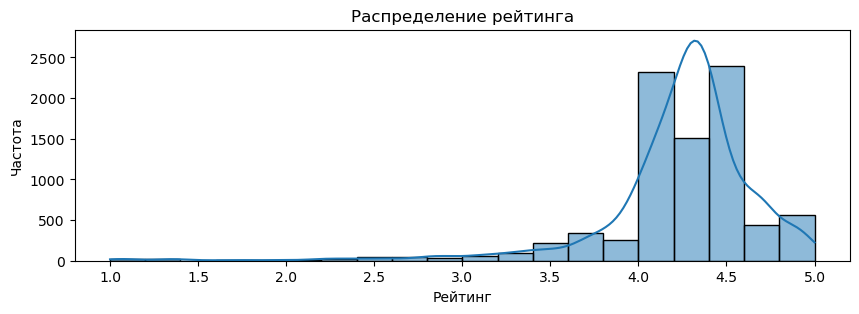

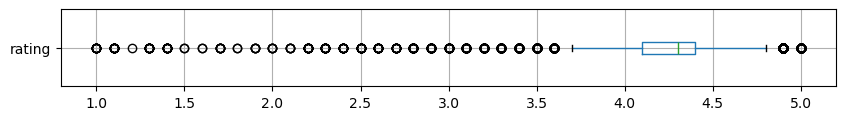

In [55]:
# Построим гистограмму распределение количества посадочных мест
plt.figure(figsize=(10,3))
sns.histplot(data=df, x='rating', bins=20, kde=True)
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.title('Распределение рейтинга')
plt.show()

# Строим диаграмму размаха методом boxplot()
plt.figure(figsize=(10,1))
boxplot=df.boxplot(column='rating', vert=False)
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">   Значение рейтинга варьируется от 1 до 5, что соответствует норме (аномалий не выявлено). Среднее и минимальное значение относительно близки, что может свидетельствовать о распределении близкому к нормальному. Из гистограммы распределения заметно смещение вправо. Диаграмма размаха показывает выбросы.

In [56]:
# Находим 5-й процентиль
outliers_=df['rating'].quantile(0.05)
print(f'5-й процентиль:{round(outliers_,2)}')

# Находим 95-й процентиль
outliers=df['rating'].quantile(0.95)
print(f'95-й процентиль:{round(outliers,2)}')

# Находим межквартальный размах IQR
# Вычисляем квартили Q1 и Q3
Q1=df['rating'].quantile(0.25)
Q3=df['rating'].quantile(0.75)

#Вычисляем межквартальный размах IQR
IQR=Q3-Q1

# Определяем верхний порог для выбросов
upper_bound=Q3+1.5*IQR

# Определяем нижний порог для выбросов
lower_bound=Q1-1.5*IQR

print(f'Нижний порог выбросов: {round(lower_bound,2)}')
print(f'Верхний порог выбросов: {round(upper_bound,2)}')

5-й процентиль:3.4
95-й процентиль:4.8
Нижний порог выбросов: 3.65
Верхний порог выбросов: 4.85


<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  
    Диаграмма размаха показывает выбросы от 1.0-3.7 и 4.8-5, расчет 5 и 95 процентиля показывает выбросы за пределами диапазона 3.4-4.8, выбросы рассчитанные путем межквартального размах IQR находятся за пределами диапазона 3.65-4.85. 
Но оценки, которые находятся за пределами и считаются выбросами оставим, т.к. это вполне реальные цифры, которые соответствуют действительности.

Text(0.5, 1.0, 'Рейтинг заведений в разрезе категорий')

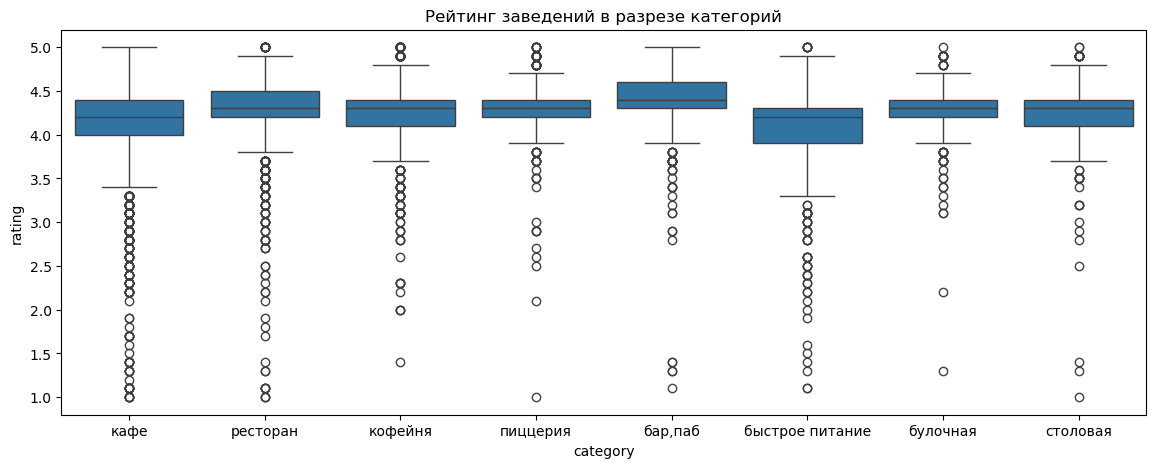

In [57]:
# Построим диаграмму размаха в разрезе категорий
plt.figure(figsize=(14,5))
boxplot=sns.boxplot(data=df, x='category', y='rating')
plt.title('Рейтинг заведений в разрезе категорий')

In [58]:
# Построим сводную статистику по рейтингу в разрезе категорий
group_rating1=df.groupby('category')['rating'].agg(['min', 'mean', 'median','std','max']).reset_index()
group_rating2=df.groupby('category')['rating'].quantile([0.25, 0.75]).unstack().rename(columns={0.25: 'q25', 0.75: 'q75'}).reset_index()
group_rating=group_rating1.merge(group_rating2, on='category').sort_values(by='median', ascending=False)
group_rating

,category,min,mean,median,std,max,q25,q75
0,"бар,паб",1.1,4.387712,4.4,0.380143,5.0,4.3,4.6
1,булочная,1.3,4.268359,4.3,0.386303,5.0,4.2,4.4
5,пиццерия,1.0,4.301264,4.3,0.336162,5.0,4.2,4.4
4,кофейня,1.4,4.277282,4.3,0.372250,5.0,4.1,4.4
6,ресторан,1.0,4.290401,4.3,0.413143,5.0,4.2,4.5
7,столовая,1.0,4.211429,4.3,0.454205,5.0,4.1,4.4
3,кафе,1.0,4.123886,4.2,0.566081,5.0,4.0,4.4
2,быстрое питание,1.1,4.050249,4.2,0.560949,5.0,3.9,4.3


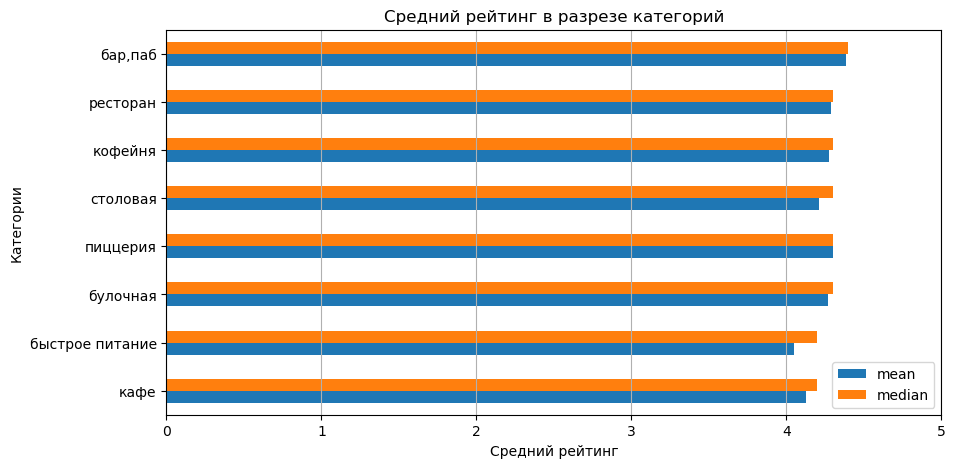

In [59]:
# Пострим линейную гстограмму 'Среднее количество посадочных мест в разрезе категорий'
group_rating.sort_values(by='median').plot(kind='barh', x='category', y=['mean','median'],figsize=(10,5))
plt.title('Средний рейтинг в разрезе категорий')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.xticks([0,1,2,3,4,5])
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Рейтинг в разрезе категорий не имеет сильных отличий, немного выбивается рейтинг быстрого питания в меньшую сторону и бар,паб в большую. Минимальный рейтинг варьируется от 1.0 (ресторан, кафе) до 2.1(пиццерий), максимальный рейтинг по всем категориям равен 5.0 Значение медианы и среднего варьируется от 4.2 и 4.02 соответственно (значения принадлежат категории быстрое питание) до 4.4 и 4.39 (значения принадлежат категории бар, паб). На линейной гистограмме видно, что средние значения различаются незначительно.

---

### Корреляция для рейтингов заведения
Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. 

In [60]:
# Расчитываем корреляцию рейтинга заведения с разными данными
# Будем использовать данные, в которых удалены выбросы по количеству посадочных мест
df_corr=df_seats_new
correlation_matrix1=df_corr[['rating','category','district', 'price', 'is_24_7', 'chain', 'seats']].phik_matrix()
correlation_matrix = correlation_matrix1.reset_index()
corr_rating0=round(correlation_matrix[['index','rating']],2).sort_values(by='rating', ascending=False)
corr_rating=corr_rating0[corr_rating0['index']!='rating']
corr_rating.style.background_gradient()


interval columns not set, guessing: ['rating', 'chain', 'seats']


,index,rating
3,price,0.260000
1,category,0.200000
4,is_24_7,0.180000
2,district,0.170000
5,chain,0.100000
6,seats,0.060000


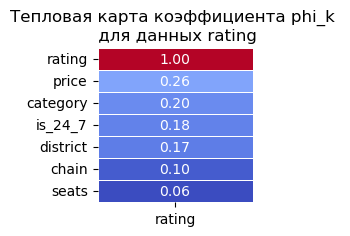

In [61]:
# Строим тепловую карту
plt.figure(figsize=(2, 2))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix1.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Наибольшая связь рейтинга возникает с ценовой категорией и состовляет 0,26 (умеренная положительная связь). С остальными данными связь слабая положительная от 0,06 (с количеством посадочных мест) до 0,2  с категориями.

In [62]:
# Сгруппируем средний рейтинг в разрезе цены
group_price=df.groupby('price')['rating'].agg(['mean','median']).reset_index().sort_values(by='mean')
group_price

,price,mean,median
2,низкие,4.157258,4.2
3,средние,4.286576,4.3
1,выше среднего,4.383306,4.4
0,высокие,4.435510,4.4


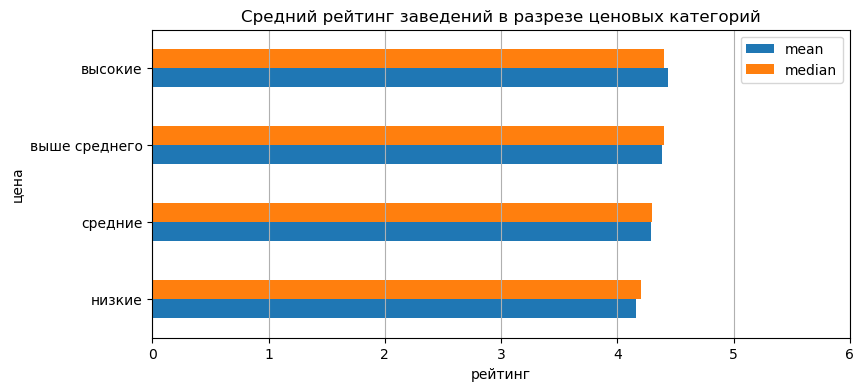

In [63]:
# Пострим линейную гстограмму 'Средний рейтинг заведений в разрезе ценовых категорий'
group_price.sort_values(by='mean').plot(kind='barh',
                                          x='price',
                                          y=['mean','median'],
                                          figsize=(9,4))
plt.xlabel('рейтинг')
plt.ylabel('цена')
plt.title('Средний рейтинг заведений в разрезе ценовых категорий')
plt.grid(axis='x')
plt.xticks([0,1,2,3,4,5,6])
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Средний и медианный рейтинг не сильно отличается в разных ценовых категориях: медианный варьируется от 4,2 до 4,4, а средние значения от 4,16 до 4,44, однако, действительно, взаимосвязь прослеживается, чем выше ценовая категория заведения, тем выше средний рейтинг и наоборот.

---

### топ-15 популярных сетей в Москве

In [64]:
# Рассчитаем средний рейтинг для Топ 15 заведений
group_name0=df[df['chain']==1].groupby(['name','category'])['rating'].agg(['count','mean']).sort_values(by='count', ascending=False).reset_index()
group_name=group_name0.iloc[0:15]
group_name

,name,category,count,mean
0,шоколадница,кофейня,119,4.178151
1,домино'с пицца,пиццерия,76,4.169737
2,додо пицца,пиццерия,74,4.286487
3,one price coffee,кофейня,71,4.064789
4,яндекс лавка,ресторан,69,3.872464
5,cofix,кофейня,65,4.075385
6,prime,ресторан,49,4.114285
7,кофепорт,кофейня,42,4.147619
8,кулинарная лавка братьев караваевых,кафе,39,4.394872
9,теремок,ресторан,36,4.105556


In [65]:
#Проверим наличие связи между количеством количеством заведений в сети и рейтингом (не только первых 15, а всех)
group_name0[['count', 'mean']].phik_matrix().style.background_gradient()

interval columns not set, guessing: ['count', 'mean']


,count,mean
count,1.000000,0.000000
mean,0.000000,1.000000


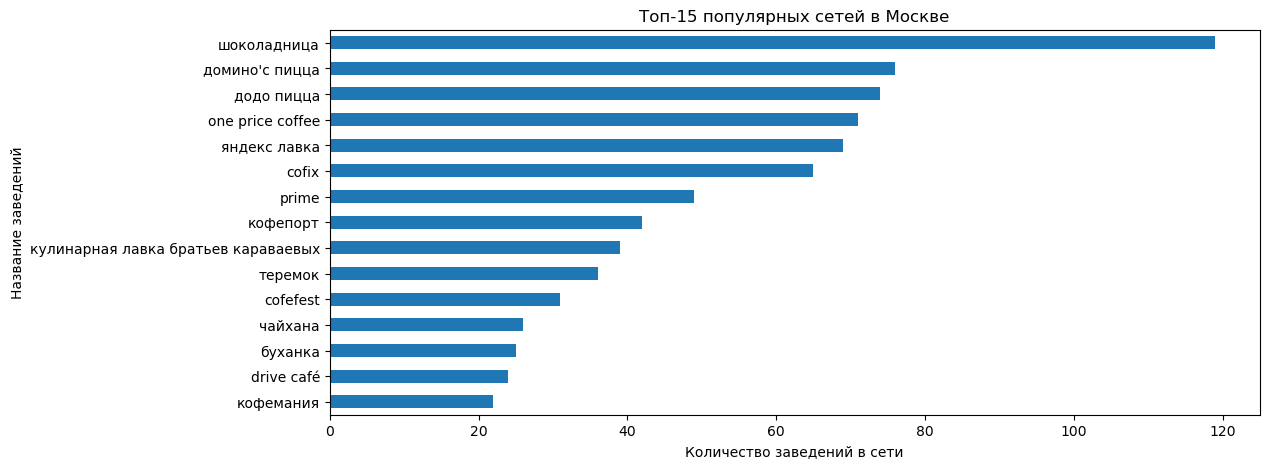

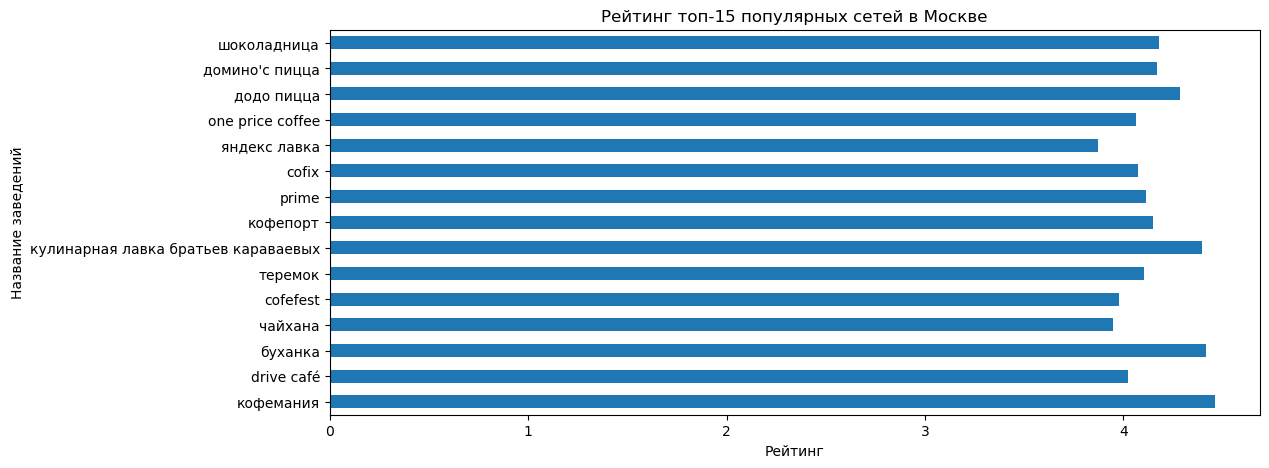

In [66]:
#Построим линейную гистограмму 'топ-15 популярных сетей в Москве'
group_name.sort_values(by='count', ascending=True).plot(kind='barh', 
                                                        x='name', 
                                                        y='count',
                                                        legend=False,
                                                        figsize=(12,5))
plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Количество заведений в сети')
plt.ylabel('Название заведений')
plt.show()

#Построим линейную гистограмму 'рейтинг топ-15 популярных сетей в Москве'
group_name.sort_values(by='count', ascending=True).plot(kind='barh', 
                                                        x='name', 
                                                        y='mean',
                                                        legend=False,
                                                        figsize=(12,5))
plt.title('Рейтинг топ-15 популярных сетей в Москве')
plt.xlabel('Рейтинг')
plt.ylabel('Название заведений')
plt.show()


 <div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  В топ-15 популярных заведений Москвы попали сети с количеством заведений в сети от 22 до 119. На первом месте сеть "шоколадница" 119 заведений. Средний рейтинг топа варьируется от 3,95 до 4,46. Взаимосвязи между количеством заведений в сети и средним рейтингом не обнаружено.

In [67]:
# Сгруппируем топ-15 популярных заведений Москвы в разрезе категорий
group_top=group_name.groupby('category')['count'].agg(['count','sum']).sort_values(by='count', ascending=False).reset_index()
group_top

,category,count,sum
0,кофейня,6,350
1,ресторан,3,154
2,кафе,3,89
3,пиццерия,2,150
4,булочная,1,25


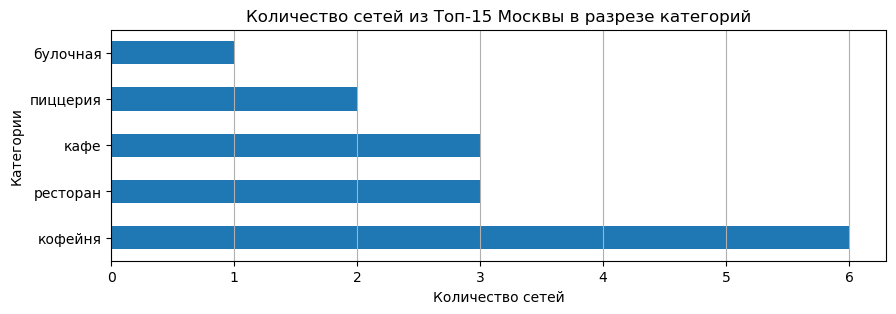

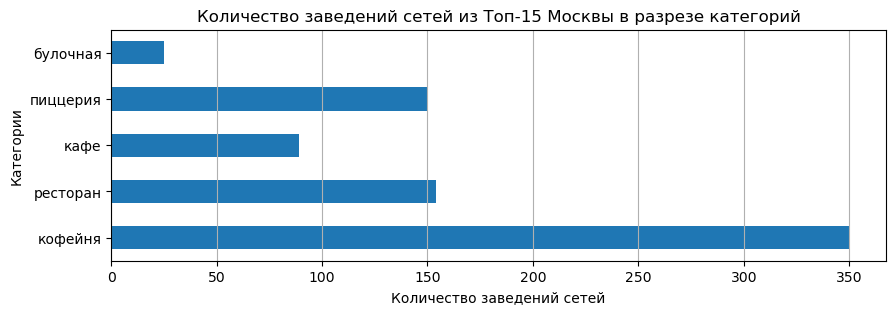

In [68]:
# Пострим ленейную гистограмму "Количество сетей из Топ-15 Москвы в разрезе категорий"
group_top.plot(kind='barh', x='category', y='count', legend=False, figsize=(10,3))
plt.title('Количество сетей из Топ-15 Москвы в разрезе категорий')
plt.xlabel('Количество сетей')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.show()

# Пострим ленейную гистограмму "Количество заведений сетей из Топ-15 Москвы в разрезе категорий"
group_top.plot(kind='barh', x='category', y='sum', legend=False, figsize=(10,3))
plt.title('Количество заведений сетей из Топ-15 Москвы в разрезе категорий')
plt.xlabel('Количество заведений сетей')
plt.ylabel('Категории')
plt.grid(axis='x')
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Больше всего заведений входит в категорию "кофейня" 6 сетей, состоящих из 350 заведений, по остальным категориям значительно меньше (примерно в 2 раза до следующей по популяроности категории).  5 (последнее) место занимает категория "булочная" 1 сеть (25 заведения).

---

### Вариация среднего чека заведения

Изучим вариацию среднего чека заведения в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Выясним,  как удалённость от центра влияет на цены в заведениях.


In [69]:
# Построим сводную статистику по среднему чеку в разрезе районов
group_bill1=df.groupby('district')['middle_avg_bill'].agg(['min', 'mean', 'median','std','max']).reset_index()
group_bill2=df.groupby('district')['middle_avg_bill'].quantile([0.25, 0.75]).unstack().rename(columns={0.25: 'q25', 0.75: 'q75'}).reset_index()
group_bill=group_bill1.merge(group_bill2, on='district').sort_values(by='median', ascending=False)
round(group_bill,2)

,district,min,mean,median,std,max,q25,q75
1,Западный административный округ,50.0,1053.229980,1000.0,779.010010,5250.0,427.50,1500.0
5,Центральный административный округ,0.0,1191.060059,1000.0,920.010010,7250.0,500.00,1500.0
4,Северо-Западный административный округ,120.0,822.219971,700.0,595.059998,2900.0,340.00,1100.0
2,Северный административный округ,130.0,927.960022,650.0,912.609985,11000.0,350.00,1250.0
7,Юго-Западный административный округ,100.0,792.559998,600.0,559.169983,2750.0,350.00,1100.0
0,Восточный административный округ,50.0,820.630005,575.0,850.900024,10000.0,338.00,1100.0
3,Северо-Восточный административный округ,50.0,716.609985,500.0,591.229980,4500.0,325.00,950.0
8,Южный административный округ,100.0,834.400024,500.0,2008.640015,35000.0,350.00,1037.5
6,Юго-Восточный административный округ,30.0,654.099976,450.0,566.830017,3750.0,281.25,887.5


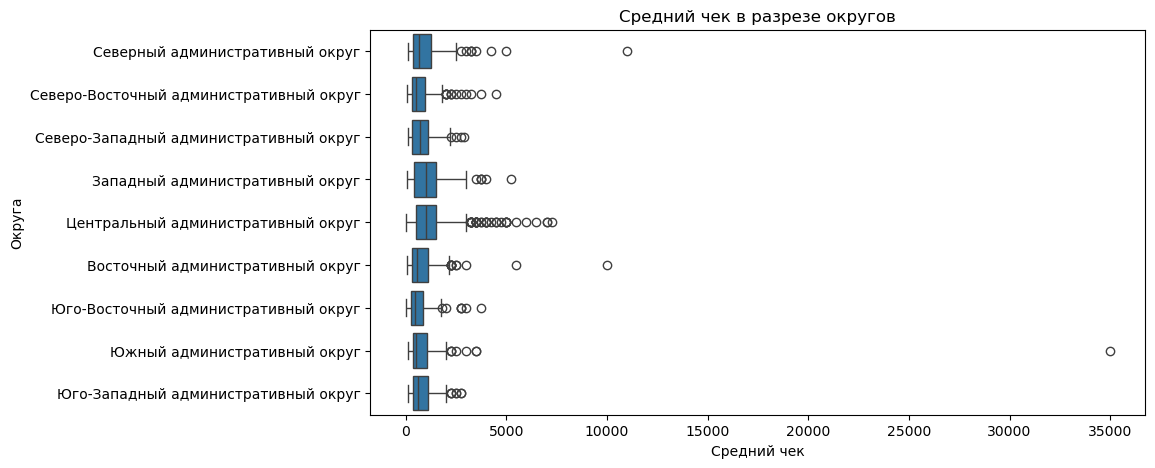

In [70]:
# Построим диаграмму размаха среднего чека в разрезе округов
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='middle_avg_bill', y='district', orient='h')
plt.title('Средний чек в разрезе округов')
plt.xlabel('Средний чек')
plt.ylabel('Округа')
plt.show()

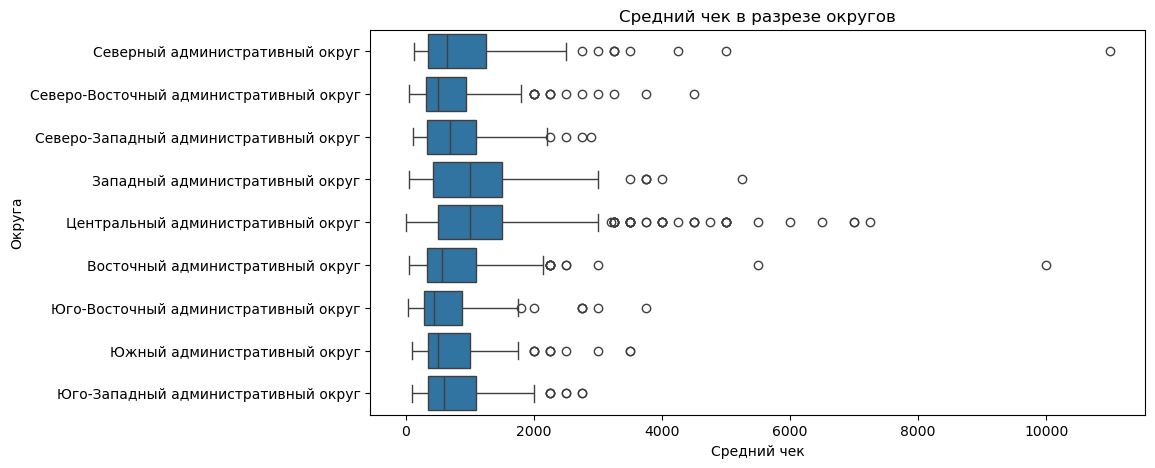

In [71]:
#Для визуализации уберем явный выброс чек 35 т.р.
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['middle_avg_bill']<15000], x='middle_avg_bill', y='district', orient='h')
plt.title('Средний чек в разрезе округов')
plt.xlabel('Средний чек')
plt.ylabel('Округа')
plt.show()

---


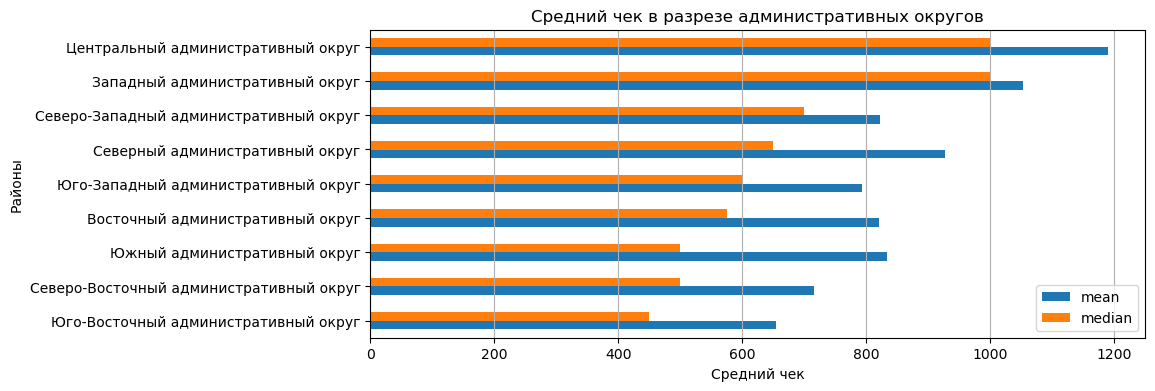

In [72]:
# Пострим ленейную гистограмму "Средний чек в разрезе административных округов"
group_bill.sort_values(by='median').plot(kind='barh', y=['mean', 'median'], x='district',figsize=(10,4))
plt.title('Средний чек в разрезе административных округов')
plt.xlabel('Средний чек')
plt.ylabel('Районы')
plt.grid(axis='x')
#plt.xticks([0,1,2,3,4,5])
plt.show()

<div style="border: 3px solid #ccc; padding: 10px; border-radius: 5px;">  Самый высокий средний чек наблюдается в Центральном административном округе. Среднее значение 1191 р., медианное 1000 р. Наиболее близкий по средним ценам к  ЦАО Западный административный округ, медианное значение такое же 1000р., а среднее немного ниже 1053 р. Самый низкий средний чек 654 р. с медианой 450р в Юго-Восточный административном округе. Из диаграммы размаха заметны выбросы, но т.к. цены в заведениях бывают разные, то выбросы не являются аномалиями и соответствуют действительности.

---

### Промежуточный вывод


- В данных представлено 8 категорий. Категории: Кафе, рестораны наиболее многочисленные, каждая представляет более 2000 заведений, суммарно они составляют 52% от всех категорий. К категории кофейня относится более 1000 заведений, по остальным категориям менее 1000 заведений. Наименьшая по количеству заведений категории булочная (256 заведений).
- Больше всего заведений находится в центральном административном округе 2242 или 27%, он сильно отличается от остальных. Заведения по остальным районам распределены от 5% до 11% (от 409 до 899 заведений на округ). Также отличается распределения в ЦАО по категориям заведений, если по Москве наибольшее количество заведений в формате кафе (31%), то ЦАО представлен в большинстве ресторанами (30% от всех заведений). Также в ЦАО кофейни и бары имеют бОльшую долю в отличие от всей Москвы, в Москве же больше пиццерий, быстрого питания, столовых, булочных в долевом соотношении.
- Несетевых заведений больше, чем сетевых на 24%. Доля сетевых заведений в категориях кофейня, пиццерия, булочная больше, чем несетевых. Обратная ситуация наблюдается по категориям: кафе, ресторан, бар,паб, столовая. Доли в категории быстрое питание равны, не зависимо от наличия сети. Самое сильно различие 9% наблюдается в категории "кофейня".
- Количество посадочных мест в датасете с обработанными выбросами варьируется от 0 до 287 единиц. Тенденция количества мест не отличается очень сильно в какой-либо отдельной категории. Медианное значение количества посадочных мест варьируется от 48(для булочной) до 80 (для ресторанов).
- Рейтинг в разрезе категорий не имеет сильных отличий, немного выбивается рейтинг быстрого питания в меньшую сторону и бар,паб в большую. Минимальный рейтинг варьируется от 1.0 (ресторан, кафе) до 2.1(пиццерий), максимальный рейтинг по всем категориям равен 5.0 . Значение медианы от 4.2 (категория быстрое питание) до 4.4 (категория бар, паб). 
- Наибольшая связь рейтинга возникает с ценовой категорией (0,26), чем выше ценовая категория заведения, тем выше средний рейтинг и наоборот.
- В топ-15 популярных заведений Москвы попали сети с количеством заведений в сети от 22 до 119. Средний рейтинг топа варьируется от 3,95 до 4,46. Больше всего заведений входит в категорию "кофейня" 6 сетей, состоящих из 350 заведений. 
- Самый высокий средний чек наблюдается в Центральном административном округе. Со средним значением 1191 руб. Наиболее близкий по средним ценам к ЦАО Западный административный округ со средним значением 1053 руб. Самый низкий средний чек 654 руб. в Юго-Восточный административном округе. 


## Итоговый вывод и рекомендации

В ходе работы была выполнена предобработка данных и проведен исследовательский анализ, на основании которого сформулированы выводы.
- В Москве из 8 категорий самые популярные Кафе и рестораны, большинство заведений сосредоточено в Центральном административном округе, преимущественно из категории рестораны. Также ЦАО имеет самый высокий средний чек по Москве. При этом наблюдается взаимосвязь между рейтингом заведений и ценовой категорией в Москве, чем выше цена, тем выше рейтинг и наоборот. Рейтинги в категории  быстрое питания меньше, чем в остальных категориях, а  категории бар,паб рейтинги выше остальных.
- В Топ 15 сетей Москвы входят сети с количеством заведений от 22 до 119 и рейтингом 3,95 до 4,46. Наиболее популярная категория у сетевого бизнеса общественного питания – кофейни. В целом сетевых заведений меньше на 24%, чем сетевых. 
- В среднем количество посадочных мест в заведениях  от 48 (для категории булочной) до 80 (для ресторанов).
